In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import os
from itertools import product
import re

In [2]:
def neighbor_edges_of_node(graph, node):
    neighbor_edges = []
    for edge in graph.edges():
        if node in edge:
            neighbor_edges.append(edge)
    return neighbor_edges

In [3]:
def is_valid_coloring(graph, coloring):
    edge_color = {edge: coloring[i] for i, edge in enumerate(graph.edges())}
    
    for edge in graph.edges():
        u, v = edge
        
        u_edges = neighbor_edges_of_node(graph, u)
        v_edges = neighbor_edges_of_node(graph, v)

        u_edges.remove(edge)
        v_edges.remove(edge)
        
        for i in range(len(u_edges)):
            if edge_color[u_edges[i]] == edge_color[edge]:
                return False
        
        for j in range(len(v_edges)):  
            if edge_color[v_edges[j]] == edge_color[edge]:
                return False
    return True

In [4]:
def draw_colored_graph(graph, coloring):    
    nx.draw(graph, with_labels=True, edge_color=coloring)
    plt.show()

In [5]:
def brute_force_edge_coloring(graph, start_time):
    n = len(graph.edges())
    iters = 0

    for coloring in product(range(1, n + 1), repeat=n):
        iters += 1
        if time.time() - start_time >= 390:
            return -1
        if is_valid_coloring(graph, coloring):
            return coloring, iters
            
    return None

In [6]:
def read_graph_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        num_nodes, num_edges = map(int, lines[0].split()[2:])  # extractiong num_nodes and num_edges
        edges = [tuple(map(int, line.split()[1:])) for line in lines[1:] if line.startswith('e')]
        graph = nx.Graph()
        graph.add_nodes_from(range(1, num_nodes + 1))
        graph.add_edges_from(edges)
        
        return graph

In [7]:
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    parts[1] = int(parts[1]) if len(parts) > 1 else 0
    return parts

In [8]:
def run_tests(directory):
    files = os.listdir(directory)
    sorted_files = sorted(files, key=numerical_sort)

    for file in sorted_files:
        if file.endswith('.txt'):
            filepath = os.path.join(directory, file)
            print(f"Running test {file}...")

            start_time = time.time()
            graph = read_graph_from_file(filepath)
            coloring_result, iter = brute_force_edge_coloring(graph, start_time)
            end_time = time.time()
           
            if coloring_result.size() == 1:
                print("Time limit exceeded.")
            else:     
                if(coloring_result):
                    print("Minimum edge coloring found.")
                    print("Number of colors:", max(coloring_result))  
                    print("Number of iterations:", iter)
                    draw_colored_graph(graph, coloring_result)
                    plt.close() 
                else:
                    print("No solution found.")   
            print("Time taken:", end_time - start_time, "seconds")
            print()        
                       

In [10]:
start_time = time.time()
graph = read_graph_from_file("./tests/graph_10_edges.txt")
coloring_result, iter = brute_force_edge_coloring(graph, start_time)
end_time = time.time()
print(coloring_result)

if coloring_result.size() == 1:
    print("Time limit exceeded.")
else:     
    if(coloring_result):
        print("Minimum edge coloring found.")
        print("Number of colors:", max(coloring_result))  
        print("Number of iterations:", iter)
        draw_colored_graph(graph, coloring_result)
        plt.close() 
    else:
        print("No solution found.")   
print("Time taken:", end_time - start_time, "seconds")
print()        

TypeError: cannot unpack non-iterable int object

Running test graph_3_edges.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 6


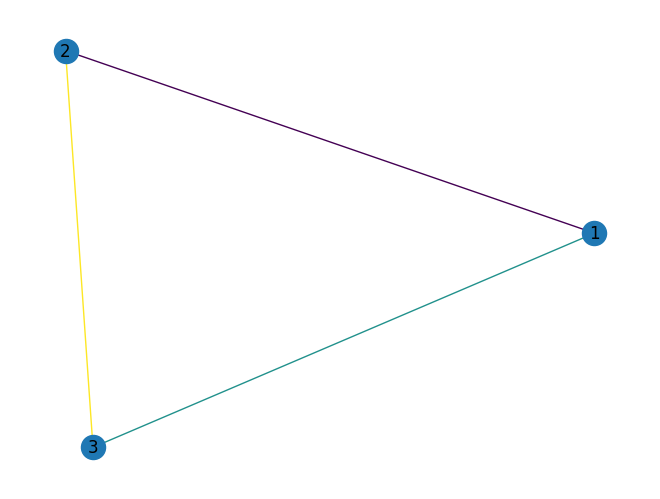

Time taken: 0.0 seconds

Running test graph_5_edges.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 181


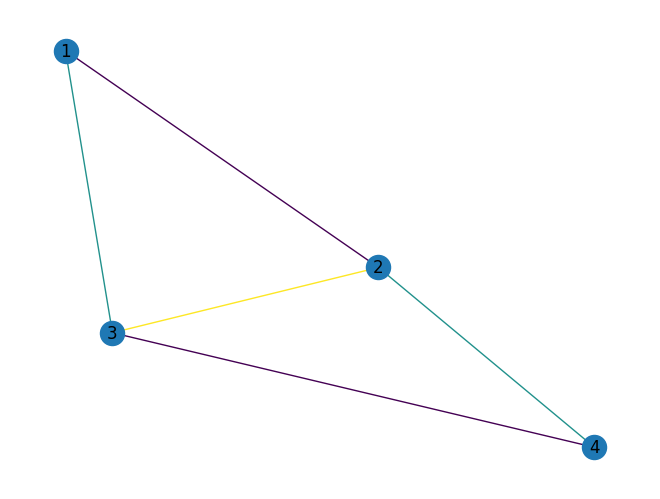

Time taken: 0.013705730438232422 seconds

Running test graph_5_edges_2.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 186


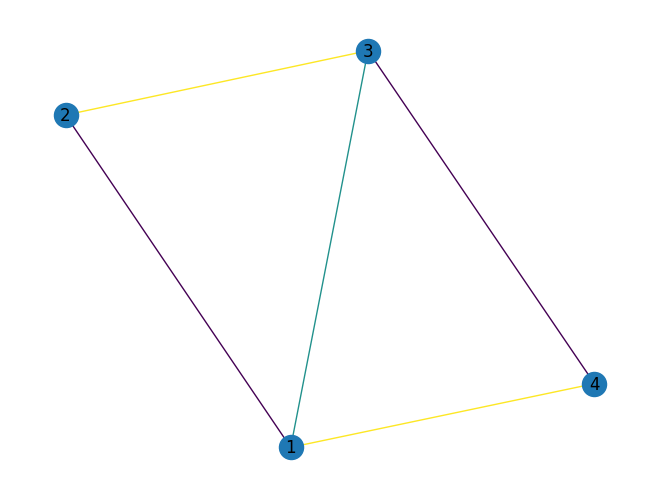

Time taken: 0.0 seconds

Running test graph_6_edges.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 1765


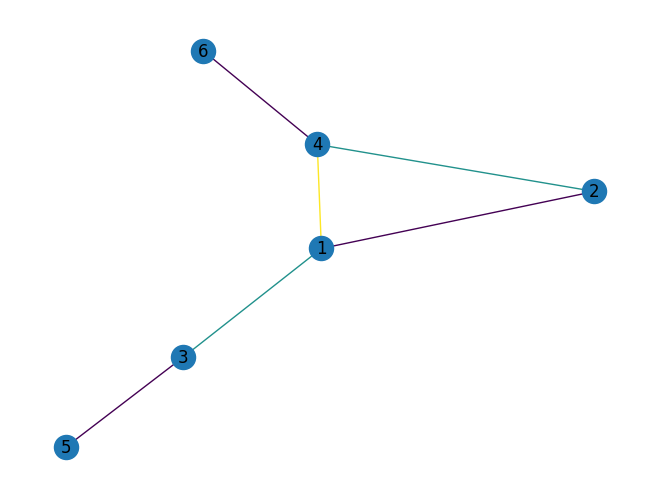

Time taken: 0.0536041259765625 seconds

Running test graph_7_edges.txt...
Minimum edge coloring found.
Number of colors: 4
Number of iterations: 22054


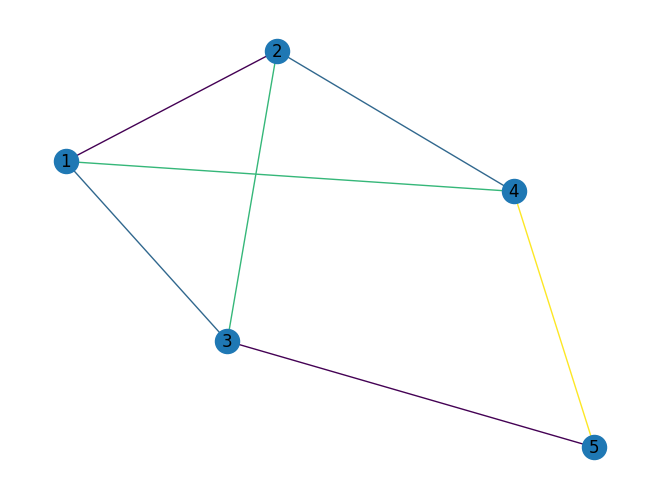

Time taken: 0.6763718128204346 seconds

Running test graph_7_edges_2.txt...
Minimum edge coloring found.
Number of colors: 4
Number of iterations: 22348


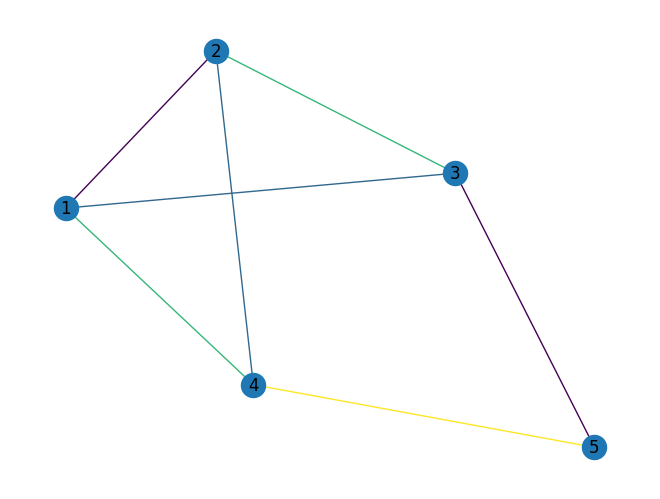

Time taken: 0.699063777923584 seconds

Running test graph_7_edges_3.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 19895


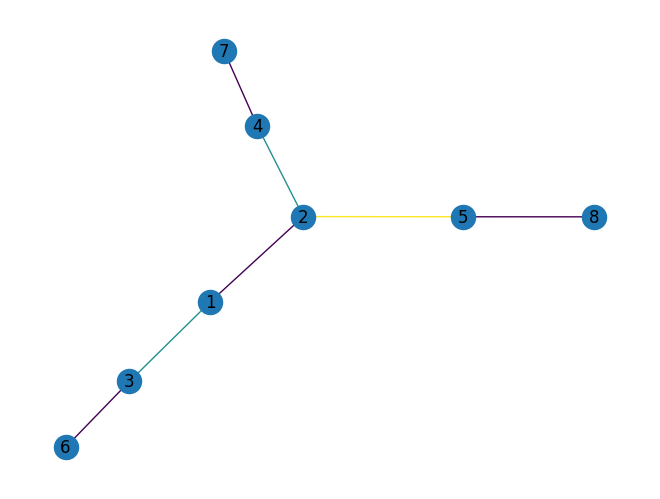

Time taken: 0.6159064769744873 seconds

Running test graph_8_edges.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 327753


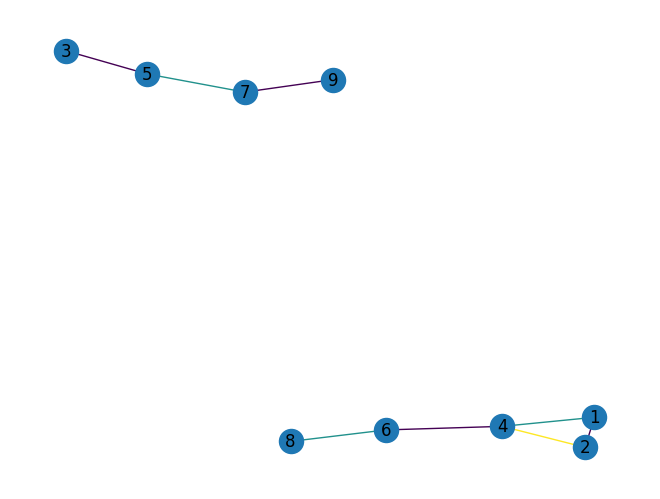

Time taken: 11.484062671661377 seconds

Running test graph_9_edges.txt...
Minimum edge coloring found.
Number of colors: 4
Number of iterations: 5906371


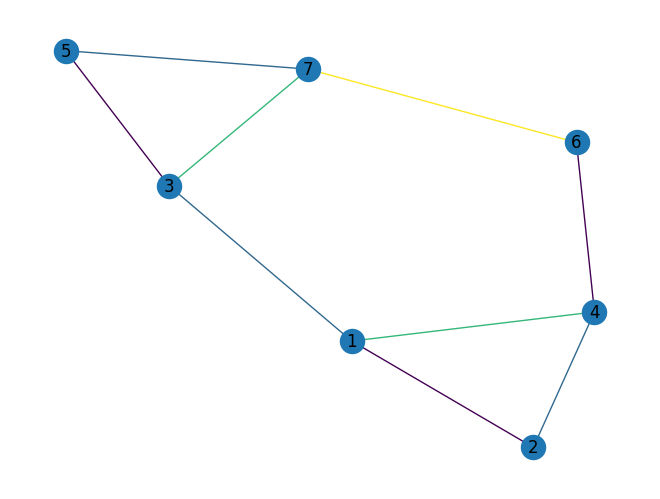

Time taken: 192.47234582901 seconds

Running test graph_9_edges_2.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 5432519


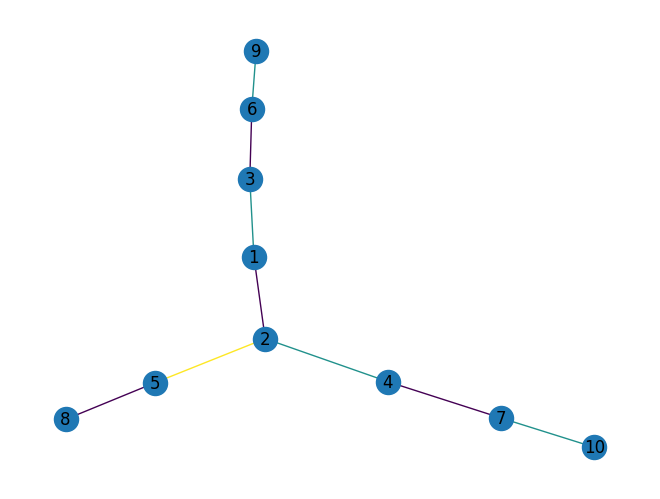

Time taken: 182.79515147209167 seconds

Running test graph_10_edges.txt...


TypeError: cannot unpack non-iterable int object

In [9]:
# run_tests('./tests')